In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('flipkart_sales.csv')
print('data loaded')

data loaded


In [3]:
data.head(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [4]:
# bar plot func
def barplot_func(x,y,title,xlb, ylb):
    plt.figure(figsize=(8,6))
    sns.barplot(x=x, y= y, palette='viridis')
    plt.title(title, fontsize = 16)
    plt.xlabel(xlb)
    plt.xticks(rotation =90)
    plt.ylabel(ylb)
    return plt.show()

# Line plot function
def lineplot_func(x, y, title, xlb, ylb):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=x, y=y, palette='viridis')
    plt.title(title, fontsize = 16)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    return plt.show()

# Scatter plot function
def scatterplot_func(x, y, title, xlb, ylb):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, palette='viridis')
    plt.title(title, fontsize = 16)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    return plt.show()

# Histogram function
def histplot_func(data, bins, title, xlb, ylb):
    plt.figure(figsize=(8, 6))
    sns.histplot(data, bins=bins, kde=True, color='blue')
    plt.title(title, fontsize = 16)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    return plt.show()

# Box plot function
def boxplot_func(x, y, title, xlb, ylb):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, palette='viridis')
    plt.title(title, fontsize = 16)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    return plt.show()

# Heatmap function
def heatmap_func(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis')
    plt.title(title, fontsize = 16)
    return plt.show()

def piechart_func(labels, sizes, title):
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize = 16)
    plt.axis('equal')
    return plt.show()

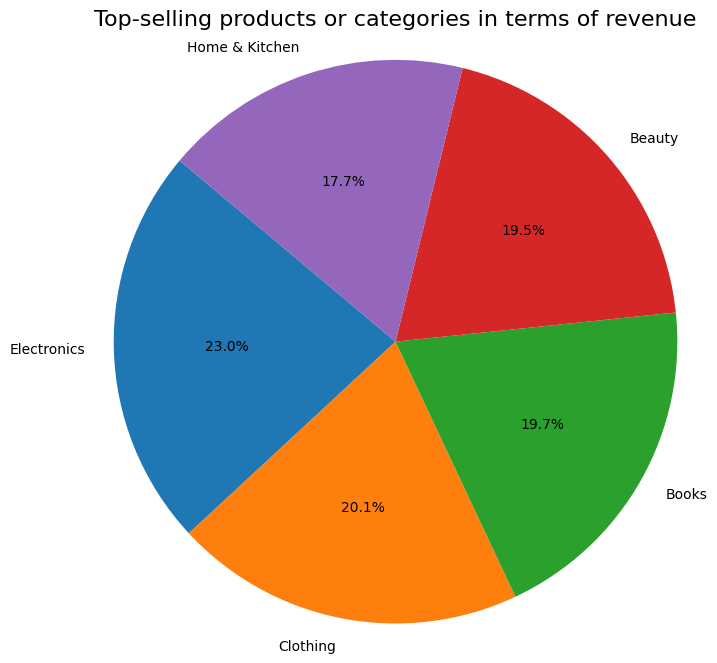

In [5]:
## What are the top-selling products or categories in terms of revenue?
mask_1 = data.groupby("Category")["Total Sales (INR)"].sum().sort_values(ascending=False)
mask_1

## Visualizing
piechart_func(
    labels= mask_1.index,
    sizes= mask_1.values,
    title= "Top-selling products or categories in terms of revenue",
    )

===================================================

## Which product category has better customer rating?

Category
Home & Kitchen    3.138860
Books             3.079904
Electronics       2.988479
Clothing          2.971429
Beauty            2.872396
Name: Customer Rating, dtype: float64


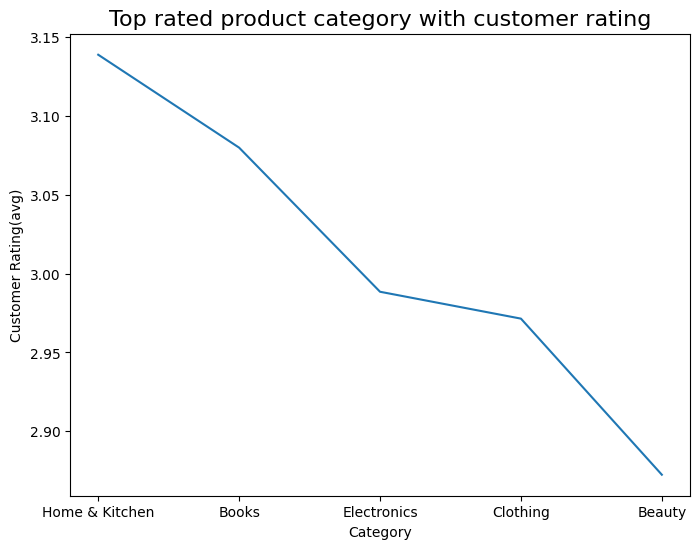

In [6]:
cst_rating = data.groupby("Category")["Customer Rating"].mean().sort_values(ascending=False)
print(cst_rating)
lineplot_func(
    x=cst_rating.index,
    xlb= "Category",
    y= cst_rating.values,
    ylb="Customer Rating(avg)",
    title="Top rated product category with customer rating"
)

## Which payment methods are most commonly used by customers?

Payment Method
UPI            176
Wallet         172
Debit Card     171
COD            169
Net Banking    166
Credit Card    146
Name: count, dtype: int64


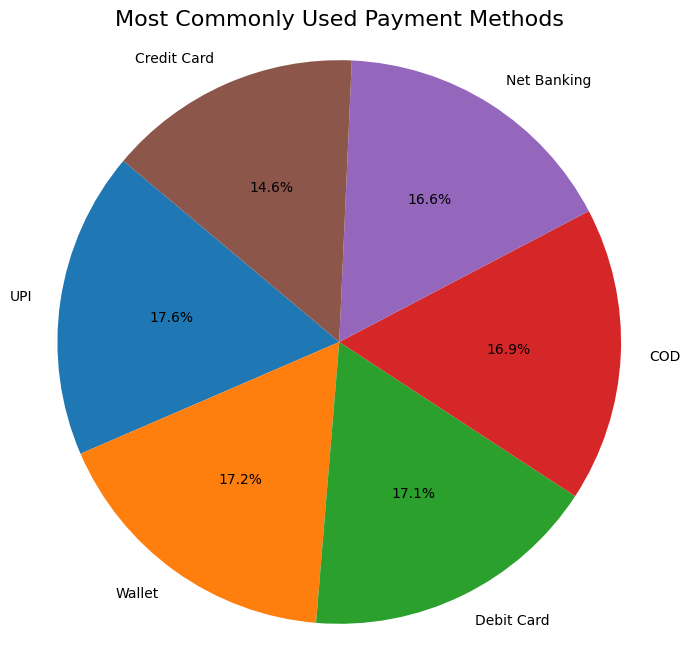

In [7]:
p_methods = data["Payment Method"].value_counts()

print(p_methods)
piechart_func(
    labels=p_methods.index,
    sizes=p_methods.values,
    title="Most Commonly Used Payment Methods"
)

## Which product sold most?

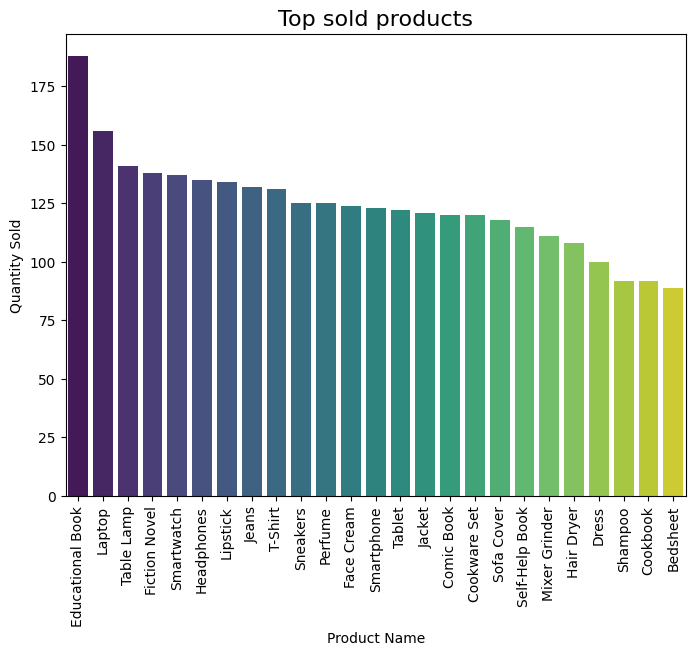

In [8]:
most_sold_p = data.groupby("Product Name")["Quantity Sold"].sum().sort_values(ascending=False)
barplot_func(
    x=most_sold_p.index,
    y=most_sold_p.values,
    xlb="Product Name",
    ylb="Quantity Sold",
    title="Top sold products"
)

## Which products have the highest profit margins?

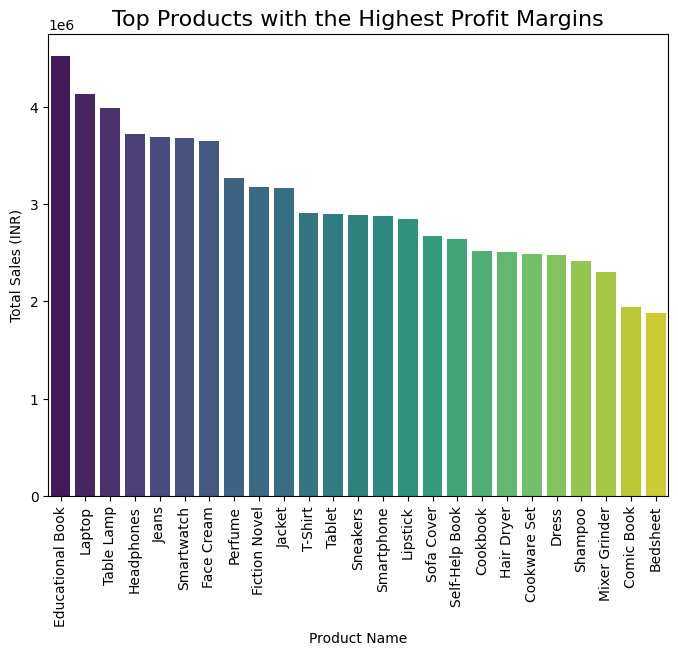

In [9]:
h_profit_prdct = data.groupby("Product Name")["Total Sales (INR)"].sum().sort_values(ascending=False)
barplot_func(
    x=h_profit_prdct.index,
    y=h_profit_prdct.values,
    title="Top Products with the Highest Profit Margins",
    xlb="Product Name",
    ylb="Total Sales (INR)"
)

Overall Average Order Value: 75213.11 INR
Average Order Value by Payment Method:
Payment Method
Net Banking    79638.238072
Wallet         78178.861395
Credit Card    76409.493082
COD            73710.867160
UPI            72675.678864
Debit Card     71009.117193
Name: Total Sales (INR), dtype: float64


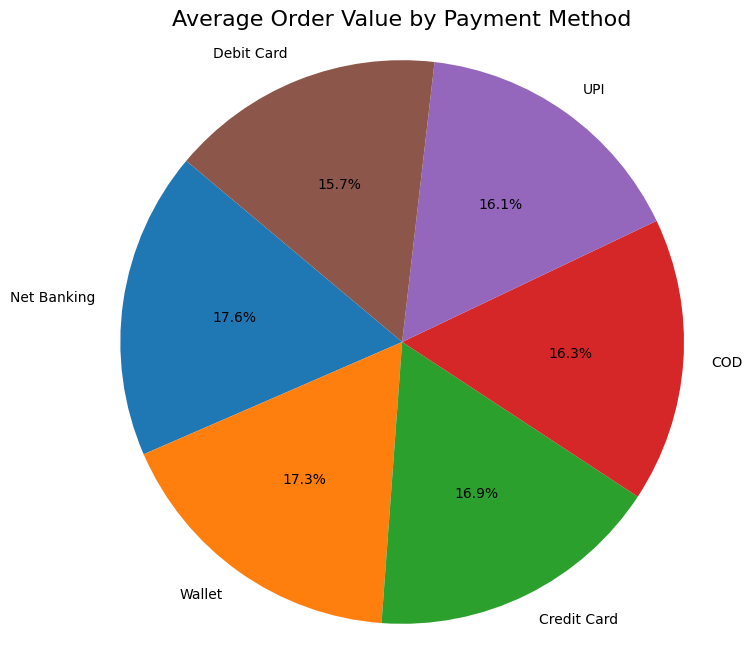

In [10]:
# overall average order value
overall_avg_order_value = data["Total Sales (INR)"].mean()
print(f"Overall Average Order Value: {overall_avg_order_value:.2f} INR")

# Calculating the average order value across different customer segments (e.g., Payment Method)
avg_order_value_by_segment = data.groupby("Payment Method")["Total Sales (INR)"].mean().sort_values(ascending=False)
print("Average Order Value by Payment Method:")
print(avg_order_value_by_segment)

# Visualize the average order value across customer segments
piechart_func(
    labels=avg_order_value_by_segment.index,
    sizes=avg_order_value_by_segment.values,
    title="Average Order Value by Payment Method"
) 

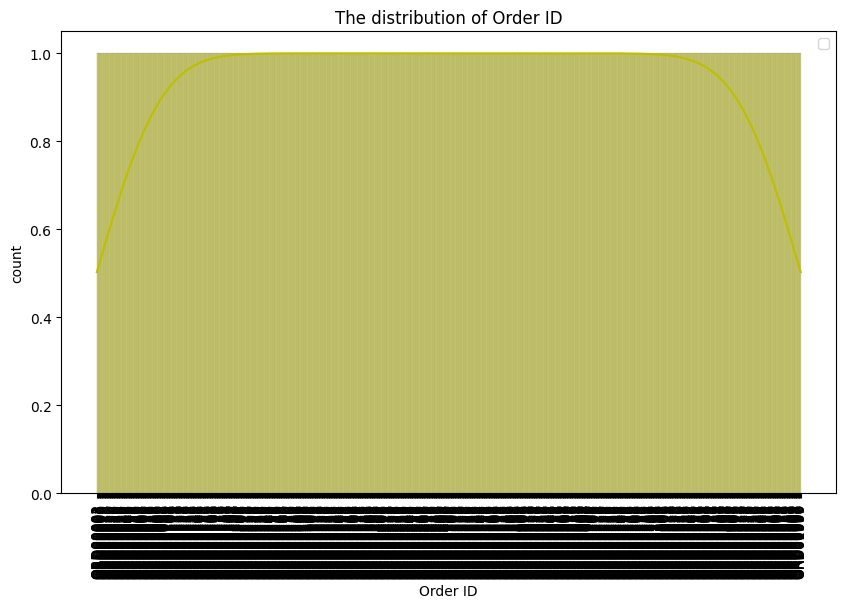

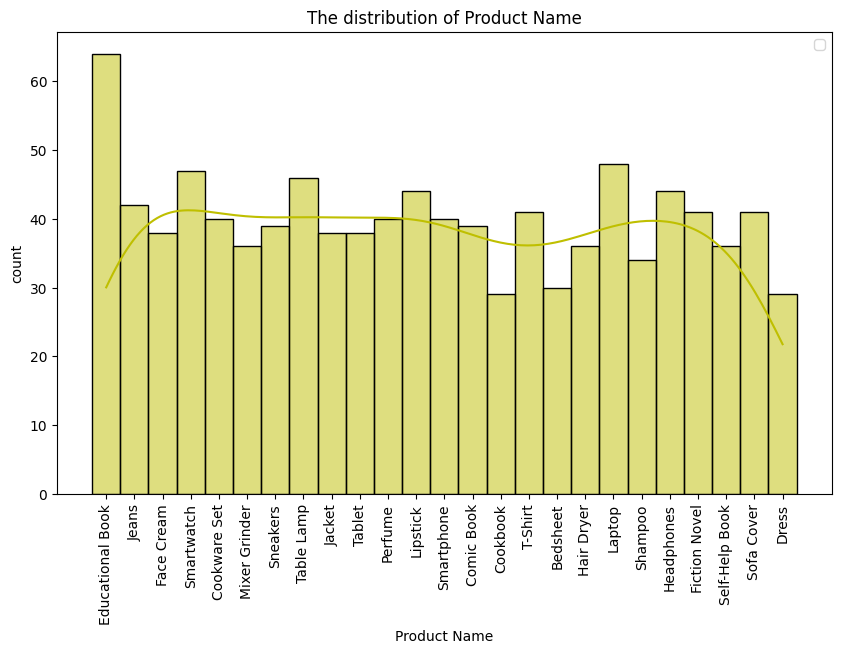

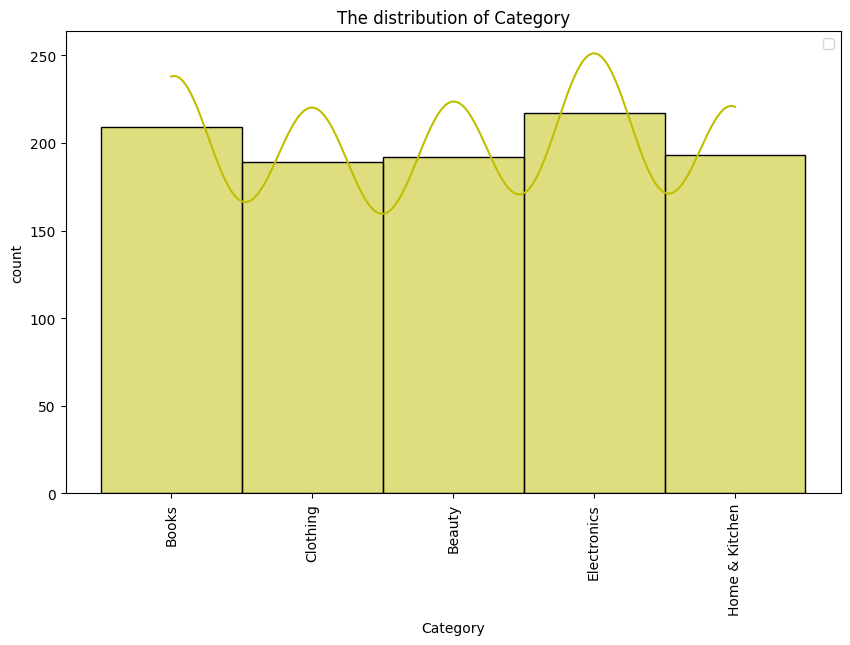

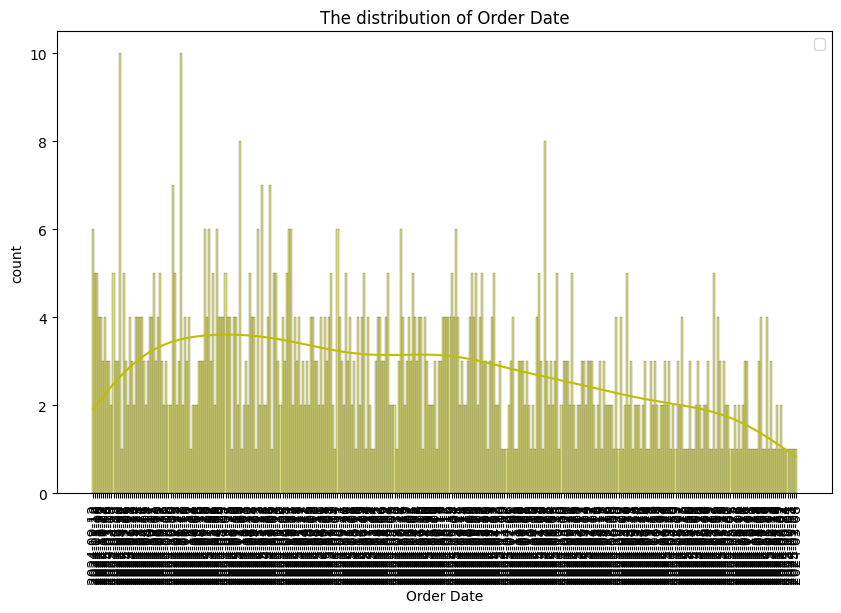

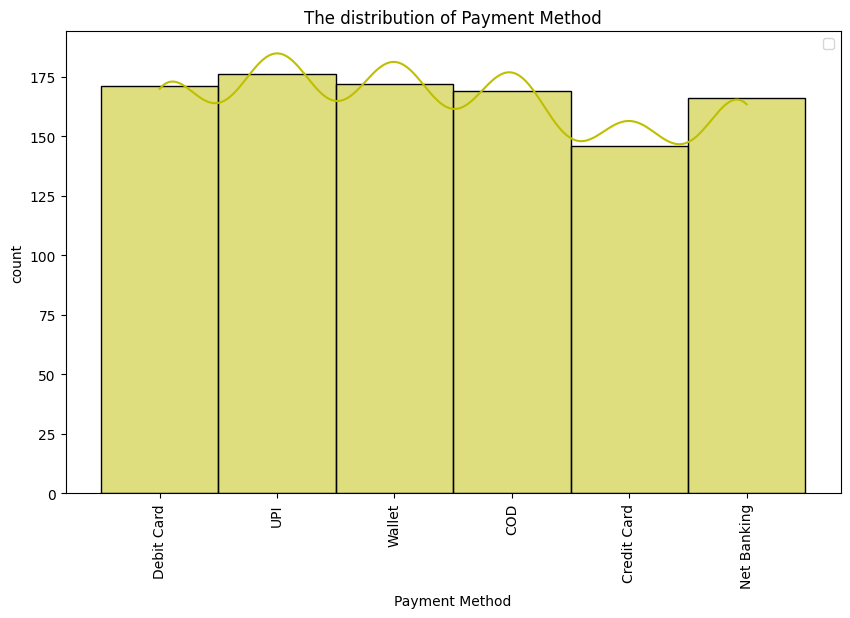

In [11]:
categorical_col = data.select_dtypes(include='object').columns 

for col in categorical_col:
    plt.figure(figsize=(10,6)) 
    sns.histplot(data=data,x=col,color='y',kde=True,)
    plt.ylabel('count')
    plt.legend()
    plt.title(f'The distribution of {col}')
    plt.xticks(rotation = 90)
    plt.show()

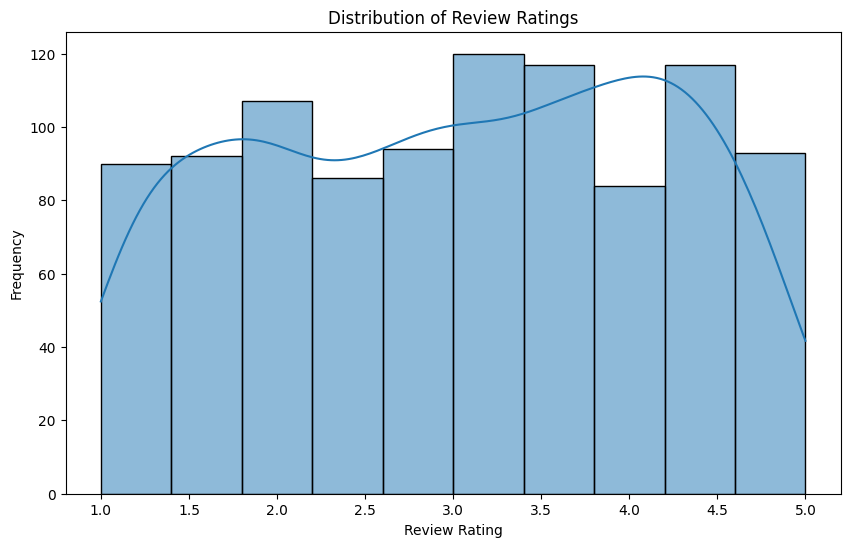

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Rating'], bins=10, kde=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

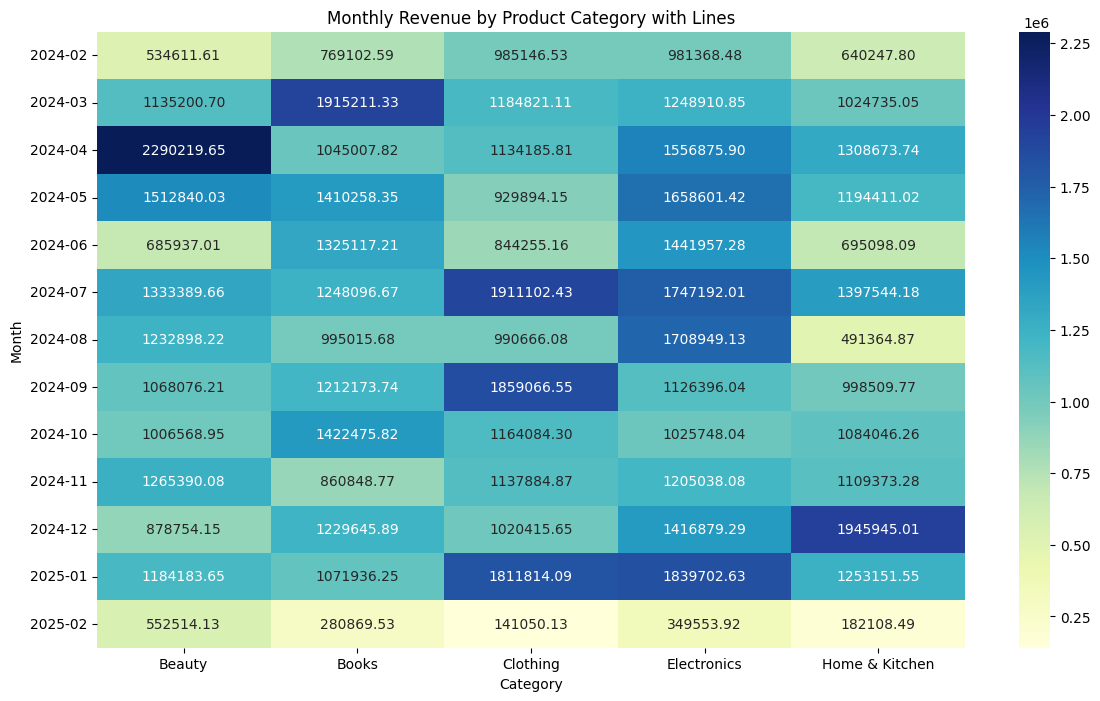

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.to_period('M').astype(str)

monthly_revenue = data.groupby(['Category', 'Month'])['Total Sales (INR)'].sum().reset_index()
heatmap_data = monthly_revenue.pivot(index='Month', columns='Category', values='Total Sales (INR)').fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
for category in heatmap_data.columns:
    plt.plot(heatmap_data[category].index, heatmap_data[category].values, marker='o', label=category)

plt.title('Monthly Revenue by Product Category with Lines')
plt.show()

# Predictive Analysis
## Linear Regression Model

In [14]:
df1 = data.copy()

In [15]:
df1.head(5)

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,Month
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,2024-09
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,2024-12
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,2024-05
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,2024-11
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,2024-12


In [16]:
df = df1.groupby(["Product Name", "Category", ])["Total Sales (INR)"].sum().reset_index()
df

,Product Name,Category,Total Sales (INR)
0,Bedsheet,Home & Kitchen,1883843.28
1,Comic Book,Books,1938459.98
2,Cookbook,Books,2514179.21
3,Cookware Set,Home & Kitchen,2490551.43
4,Dress,Clothing,2477929.93
5,Educational Book,Books,4522055.35
6,Face Cream,Beauty,3646816.97
7,Fiction Novel,Books,3172999.91
8,Hair Dryer,Beauty,2505130.67
9,Headphones,Electronics,3722765.27


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [18]:
x = df.drop(columns= ["Total Sales (INR)"])
y = df["Total Sales (INR)"]
label_cols = x.select_dtypes('object')
lb_encoders = {}
for col in label_cols:
    lb_encoders[col] =LabelEncoder()
    x[col] = lb_encoders[col].fit_transform(x[col])

## Find the best random state value for better r2 score.

In [19]:
def find_best_random_state(df, target_col, test_size=0.2, random_state_range=range(1, 206)):

    x = df.drop(columns=[target_col])
    y = df[target_col]

    label_cols = x.select_dtypes('object')
    lb_encoders = {}
    for col in label_cols:
        lb_encoders[col] = LabelEncoder()
        x[col] = lb_encoders[col].fit_transform(x[col])

    best_r2 = -float('inf')
    best_random_state = None

    for random_state in random_state_range:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

        model = LinearRegression()
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_random_state = random_state

    return best_r2, best_random_state

best_r2, best_random_state = find_best_random_state(df, target_col="Total Sales (INR)")
print(f'Best R^2 Score: {best_r2} with random_state: {best_random_state}')

Best R^2 Score: 0.19440295459919277 with random_state: 168


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=63)

model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2 * 100}')

Mean Absolute Error: 595068.6369096943
Mean Squared Error: 466469716081.1642
R^2 Score: -16.857087956092155
